<a href="https://colab.research.google.com/github/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/blob/master/notebooks/8-Pandas_Excercise_with_UPRM_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction




# Importing Libraries 



This only needs to be run once!!

Pandas is a Python library used for data manipulation and analysis of numerical tables and time series. Since we will be working with tabulated data we can take advantage of Pandas' extensive modularity and variety of methods to work with tables.



In [ ]:
import pandas as pd  # This imports the Pandas Library and gives it a reference name to access pandas and it's methods

## Loading in Data

There are 3 main ways to upload and access data in Google Colab:


1.   From Google Drive (mounting the drive)
2.   Directly from your computer
3.   Store that data somewhere in the internet and specify it's url (**our method**)



We are loading a csv file with information about Physics courses that are offered for this semester at UPRM

### Method 1: Google Drive

In [ ]:
# Data in a Google Drive
from google.colab import drive
drive.mount('/content/drive')
data_in_drive="/content/drive/MyDrive/UPRM/STEM Workshop/Feb 2021/Data/emr_horario1_table_data.csv"


df=pd.read_csv(data_in_drive,
               encoding="iso8859",
               na_values="-") 
df

### Method 2: Upload from computer

In [ ]:
# Or just upload the data from your computer to the Session
data = "emr_horario1_table_data.csv"

df=pd.read_csv(data,
               na_values="-") 
df

### Method 3: Load from Internet

define where the data is located as a string and store it in a variable. 
for example: 
`data='data_location' (using single or double quotes)`


**Important** 

Always look at your data beforehand. Be familiar with the structure and what it contains.

Also, in case you want to do this with your students, the easiest way is to have the data stored somewhere on the internet and have a link that your students can access. In our case this would be to store the file in a Github Repository and we will access it from there as follows

In [ ]:
# Our method (From Internet)
data_url="https://raw.githubusercontent.com/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/master/data/emr_horario1_table_data.csv"


#here we load the csv file and specify which row is a header and what is considered as N/A value
df=pd.read_csv(data_url,
               na_values="-",
               encoding="utf8")
# normally we don't specify this. To figure out if you need to specify this or not, look at the data.
# usual names of encoders are iso8859, utf8 and ascii

# For more information about each argument you could hover your cursor over the function until a window appears
# you could also put your cursor INSIDE the function and press Ctrl+Shift+Space


## Let's look at the first 5 entries of the data

In [ ]:
df.head()

,Semester,Course,Course Name,Section,Credits,Capacity,Days,Hours,Room,Professor,Id
0,2020S2,FISI3091,ELEMENTS OF PHYSICS,040,3.0,30.0,M W F,10:30 am - 11:20 am,325,Carlos Pabon Ortiz,479673
1,2020S2,FISI3091,ELEMENTS OF PHYSICS,041,3.0,32.0,M W F,10:30 am - 11:20 am,322,Samuel Santana Colon,479676
2,2020S2,FISI3091,ELEMENTS OF PHYSICS,060,3.0,30.0,M W F,12:30 pm - 1:20 pm,325,Carlos Pabon Ortiz,479679
3,2020S2,FISI3091,ELEMENTS OF PHYSICS,070,3.0,33.0,M W F,1:30 pm - 2:20 pm,322,Kevin Vargas Velez,479691
4,2020S2,FISI3092,Elements Of Physics Lab,026,1.0,22.0,Th,8:30 am - 10:20 am,F220,DIANA LIZA CASTILLO,479701


We don't need the "Semester" and the "?" columns. Let's filter them out

In [ ]:
# This gives us the names of the colums available
print(df.columns)


Index(['Semester', 'Course', 'Course Name', 'Section', 'Credits', 'Capacity',
       'Days', 'Hours', 'Room', 'Professor', 'Id'],
      dtype='object')


 We want so know some info about the data

In [ ]:
relevant=df[['Course',"Course Name",'Section','Credits',"Professor"]]
print(relevant.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Course       147 non-null    object 
 1   Course Name  147 non-null    object 
 2   Section      147 non-null    object 
 3   Credits      137 non-null    float64
 4   Professor    147 non-null    object 
dtypes: float64(1), object(4)
memory usage: 5.9+ KB
None


Pandas can automatically convert the data in each column inteligently by looking at the entries in each column. (In our case from `Object` to `String`

In [ ]:
relevant=relevant.convert_dtypes() #This converts the data

# Now we can verify and see the information that our dataframe contains
print(relevant.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Course       147 non-null    string
 1   Course Name  147 non-null    string
 2   Section      147 non-null    string
 3   Credits      137 non-null    Int64 
 4   Professor    147 non-null    string
dtypes: Int64(1), string(4)
memory usage: 6.0 KB
None


Now that we have the appropiate format we can choose the columns we want to look at, say "Professor" and "Credits". And we can also filter the incomplete entries by using the `dropna()` method 

In [ ]:
prf_and_cred=relevant[["Professor","Credits"]].dropna()
prf_and_cred.count() #This shows the amount of entries left

Professor    137
Credits      137
dtype: int64

Let's look at the data we have left

In [ ]:
prf_and_cred

,Professor,Credits
0,Carlos Pabon Ortiz,3
1,Samuel Santana Colon,3
2,Carlos Pabon Ortiz,3
3,Kevin Vargas Velez,3
4,DIANA LIZA CASTILLO,1
...,...,...
136,Erick Roura Davila,1
137,Samuel Santana Colon,1
138,Erick Roura Davila,3
139,Rafael Ramos,3


# Formatting

We want to know a few things:
- How many professors we have
- How many sections (groups) are they teaching
- How many credits they have

First we could sort the lists alfabetically (but counting all of those by hand is a bit tedious)

In [ ]:
sorted=prf_and_cred.sort_values(by="Professor")
sorted

,Professor,Credits
117,ALEXIS AGUIRRE NARVAEZ,1
102,ALEXIS AGUIRRE NARVAEZ,1
110,ALEXIS AGUIRRE NARVAEZ,1
115,ALVARO GUERRERO LAOS,1
116,ALVARO GUERRERO LAOS,1
...,...,...
94,THALIA QUINTANA JARAMILLO,1
90,THALIA QUINTANA JARAMILLO,1
77,Yong Jihn Kim,4
67,Yong Jihn Kim,4


A smart way to count the amount of professors available is to count them by their unique name.
Let's extract the information from the list of names and count them 

In [ ]:


Cred=sorted["Credits"]
Prof=sorted["Professor"]


# Non sorted
# Cred=prf_and_cred["Credits"]

# Prof=prf_and_cred["Professor"]


## How many professors do we have ?

In [ ]:
Prof.unique()

<StringArray>
[   'ALEXIS         AGUIRRE         NARVAEZ',
                      'ALVARO GUERRERO LAOS',
                      'Alnaldo Zapata Velez',
                'Armando Rua De La Asuncion',
    'CRISTHIAN      SUAREZ          BARBOSA',
                        'Carlos Pabon Ortiz',
            'Cesar Augusto Pollack Chinchay',
                   'DANILO ARTURO RODRIGUEZ',
                       'DIANA LIZA CASTILLO',
   'DIEGO          PACHERREZ       GALLARDO',
                 'DIEGO GUTIERREZ VILLAREAL',
                   'Dilsom Sanchez Quintero',
                        'Edgar Albelo Ortiz',
                        'Erick Roura Davila',
                  'Frank W. Mendoza Centeno',
                      'German Vazquez Perez',
 'HAROLD         GUERRERO        DE LA CRUZ',
                   'Hector Jimenez Gonzalez',
                       'Hector Mendez Mella',
                             'Henri Radovan',
    'JAVIER         RUIDIAZ         BUELVAS',
   'JESUS          O

## How many sections do they teach?

Remember what we have so far. `Prof` is a series of names for each section offered.

In [ ]:
Prof

117      ALEXIS         AGUIRRE         NARVAEZ
102      ALEXIS         AGUIRRE         NARVAEZ
110      ALEXIS         AGUIRRE         NARVAEZ
115                        ALVARO GUERRERO LAOS
116                        ALVARO GUERRERO LAOS
                         ...                   
94     THALIA         QUINTANA        JARAMILLO
90     THALIA         QUINTANA        JARAMILLO
77                                Yong Jihn Kim
67                                Yong Jihn Kim
70                                Yong Jihn Kim
Name: Professor, Length: 137, dtype: string

For this we have many options, but the simplest and fastest one we have is via a method called `value_counts()`. This will return the amount of times the professor's name appears in the list.

In [ ]:
Prof.value_counts()

Erick Roura Davila                           6
Neida M. Santacruz Sarmiento                 5
Samuel Santana Colon                         5
Cesar Augusto Pollack Chinchay               5
Kevin Vargas Velez                           5
DIANA LIZA CASTILLO                          4
Joel De Jesus Matos                          4
DANILO ARTURO RODRIGUEZ                      4
DIEGO          PACHERREZ       GALLARDO      4
CRISTHIAN      SUAREZ          BARBOSA       4
Dilsom Sanchez Quintero                      4
Junqiang Lu                                  4
Frank W. Mendoza Centeno                     4
Edgar Albelo Ortiz                           4
Julian Salinas Aviles                        3
Yong Jihn Kim                                3
ALVARO GUERRERO LAOS                         3
JAVIER         RUIDIAZ         BUELVAS       3
Henri Radovan                                3
German Vazquez Perez                         3
Juan Eduardo Ramirez Vargas                  3
DIEGO GUTIERR

This is great!
But we can use a plot to show this information in a graphical way

### Making a plot 
We will use Matplotlib's pyplot library for plots

In [ ]:
import matplotlib.pyplot as plt

We first need to extract the information in `Prof.value_counts()` somehow. 

One way is to use `Prof.value_counts().index` to get the names of the professors and use `Prof.value_counts().loc["Professor Name"]` (or `Prof.value_counts().iloc[some number]`) to get the amount of sections.

Here is an example

In [ ]:
R=0 #R indicates the row number in Prof.value_counts() function
print("Amount of sections for", Prof.value_counts().index[R], ":", Prof.value_counts().iloc[R]) 


Amount of sections for Erick Roura Davila : 6


Let's store this informaiton into two variable called `Names` and `count`.

In [ ]:
Names=Prof.value_counts().index
Count=[i for i in Prof.value_counts()]

print(Names,"\n",Count)

Index(['Erick Roura Davila', 'Neida M. Santacruz Sarmiento',
       'Samuel Santana Colon', 'Cesar Augusto Pollack Chinchay',
       'Kevin Vargas Velez', 'DIANA LIZA CASTILLO', 'Joel De Jesus Matos',
       'DANILO ARTURO RODRIGUEZ', 'DIEGO          PACHERREZ       GALLARDO',
       'CRISTHIAN      SUAREZ          BARBOSA', 'Dilsom Sanchez Quintero',
       'Junqiang Lu', 'Frank W. Mendoza Centeno', 'Edgar Albelo Ortiz',
       'Julian Salinas Aviles', 'Yong Jihn Kim', 'ALVARO GUERRERO LAOS',
       'JAVIER         RUIDIAZ         BUELVAS', 'Henri Radovan',
       'German Vazquez Perez', 'Juan Eduardo Ramirez Vargas',
       'DIEGO GUTIERREZ VILLAREAL', 'Carlos Pabon Ortiz',
       'Alnaldo Zapata Velez', 'HAROLD         GUERRERO        DE LA CRUZ',
       'Raul Portuondo Duany', 'JESUS          ORTEGA          CHAGUEZA',
       'KEVIN CASTRO ANGULO', 'THALIA         QUINTANA        JARAMILLO',
       'Pablo J Marrero Soto', 'NEFTALI YEPES LARA', 'Moises Orengo Aviles',
       'ALEXIS

Let's plot Names vs Amount of sections

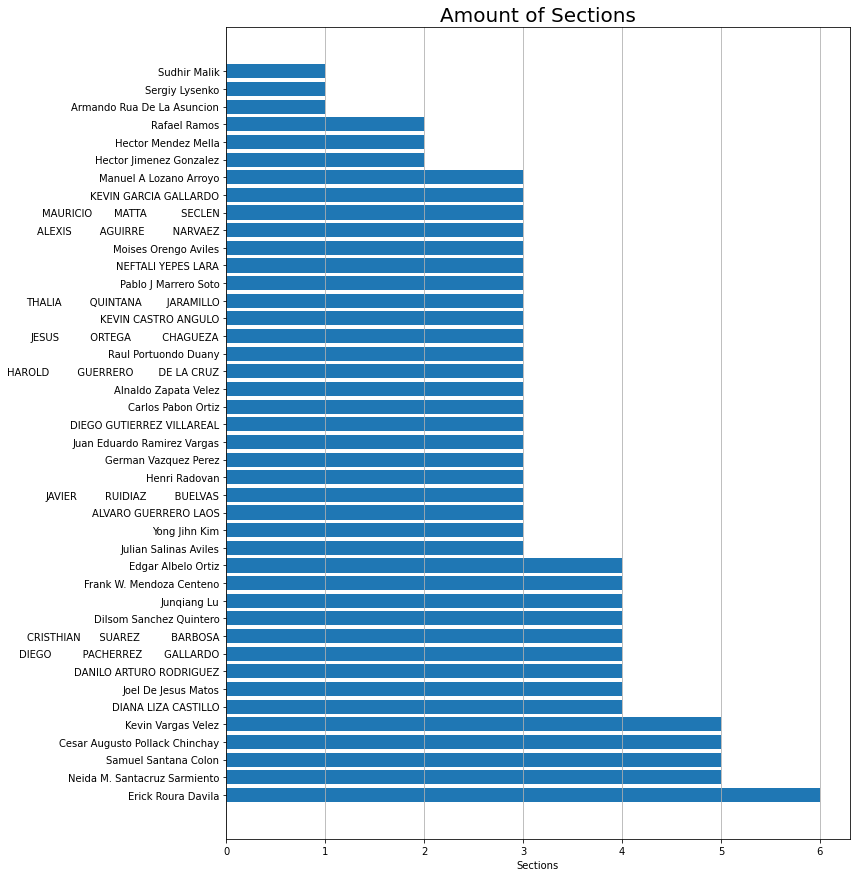

In [ ]:
plt.figure(figsize=(12,12))
plt.barh(Names,Count)
plt.xlabel("Sections")
plt.grid(axis='x')
plt.tight_layout()
plt.title("Amount of Sections",fontsize=20)
plt.show()

Great! we have our plot, but it's kinda dull. Let's use the seaborn library to make the plot look extra nice

In [ ]:
import seaborn as sns

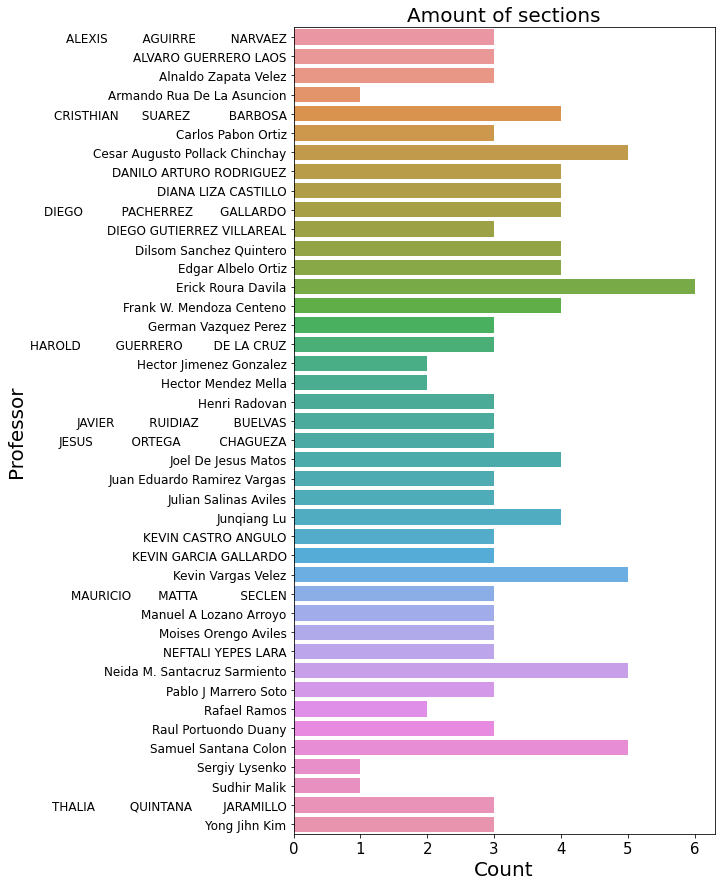

In [ ]:
plt.figure(figsize=(10,12))
sns.countplot(y=Prof)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.title("Amount of sections",fontsize=20)
plt.ylabel("Professor",fontsize=20)
plt.xlabel("Count",fontsize=20)
plt.show()

## How many credits do they have?

For this we can use a combination of methods from pandas. 

We will use the `groupby()` method to find the amount of credits each professor has.


Here's an example

In [ ]:
prf_and_cred.groupby(by="Professor").sum()


,Credits
Professor,
ALEXIS AGUIRRE NARVAEZ,3
ALVARO GUERRERO LAOS,3
Alnaldo Zapata Velez,3
Armando Rua De La Asuncion,2
CRISTHIAN SUAREZ BARBOSA,4
Carlos Pabon Ortiz,9
Cesar Augusto Pollack Chinchay,15
DANILO ARTURO RODRIGUEZ,4
DIANA LIZA CASTILLO,4


Let's save it in a variable for less typing

In [ ]:
cred_data=prf_and_cred.groupby(by="Professor").sum().Credits


In [ ]:
cred_data

Professor
ALEXIS         AGUIRRE         NARVAEZ        3
ALVARO GUERRERO LAOS                          3
Alnaldo Zapata Velez                          3
Armando Rua De La Asuncion                    2
CRISTHIAN      SUAREZ          BARBOSA        4
Carlos Pabon Ortiz                            9
Cesar Augusto Pollack Chinchay               15
DANILO ARTURO RODRIGUEZ                       4
DIANA LIZA CASTILLO                           4
DIEGO          PACHERREZ       GALLARDO       4
DIEGO GUTIERREZ VILLAREAL                     3
Dilsom Sanchez Quintero                      14
Edgar Albelo Ortiz                            4
Erick Roura Davila                           17
Frank W. Mendoza Centeno                     15
German Vazquez Perez                          3
HAROLD         GUERRERO        DE LA CRUZ     3
Hector Jimenez Gonzalez                       6
Hector Mendez Mella                           5
Henri Radovan                                11
JAVIER         RUIDIAZ        

### Bar plot of Professors and Credits

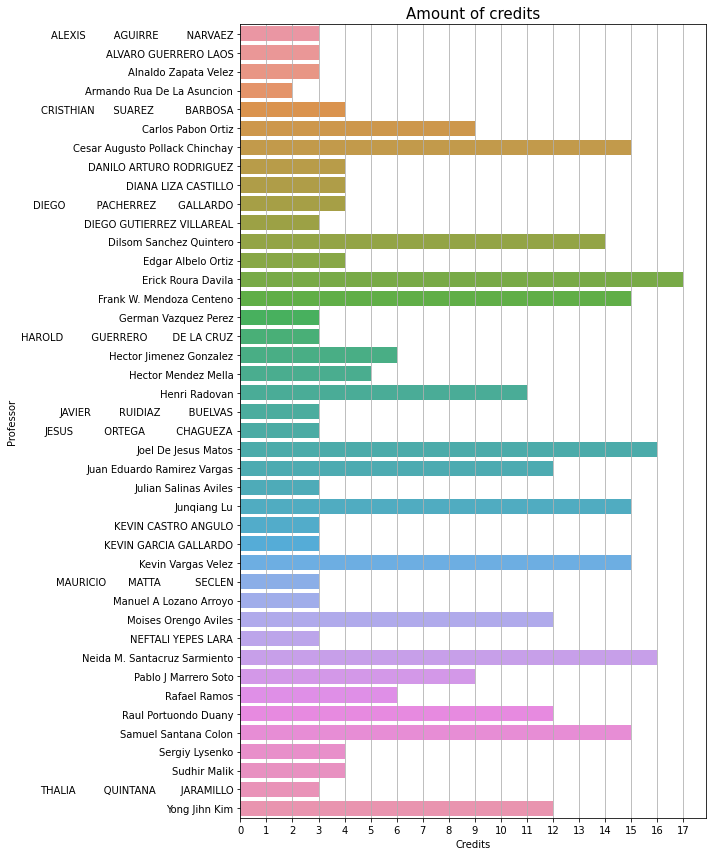

In [ ]:
plt.figure(figsize=(10,12))
plt.grid()
sns.barplot(x=cred_data,y=cred_data.index)
plt.xticks(ticks=range(0,max(cred_data)+1),fontsize=10)
plt.title("Amount of credits",fontsize=15)
plt.tight_layout()
plt.show()